In [73]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:
df = pd.read_csv("../data/processed_weather_data.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1656, 5)


,temperature,humidity,pressure,wind_speed,weather
0,-0.154501,-0.881339,0.162686,-0.555270,0
1,-0.676133,0.371485,-0.001287,-0.068962,1
2,-0.330152,-1.140544,-0.001287,0.309847,0
3,-1.253122,1.537908,0.490631,-0.575746,1
4,-0.285441,-0.794937,-0.001287,0.099966,0


In [75]:
X = df.drop("weather", axis=1)
y = df["weather"]

print("X Shape:", X.shape)
print("y Shape:", y.shape)


X Shape: (1656, 4)
y Shape: (1656,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 1242
Testing Samples: 414


In [77]:
log_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier(
    max_depth=12,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42
)


In [ ]:
log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Models trained successfully")


✅ Models trained successfully


In [79]:
log_pred = log_model.predict(X_test)
dt_pred  = dt_model.predict(X_test)
rf_pred  = rf_model.predict(X_test)


In [80]:
log_acc = accuracy_score(y_test, log_pred)
dt_acc  = accuracy_score(y_test, dt_pred)
rf_acc  = accuracy_score(y_test, rf_pred)

print("Logistic Accuracy:", log_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)


Logistic Accuracy: 0.5700483091787439
Decision Tree Accuracy: 0.7294685990338164
Random Forest Accuracy: 0.8140096618357487


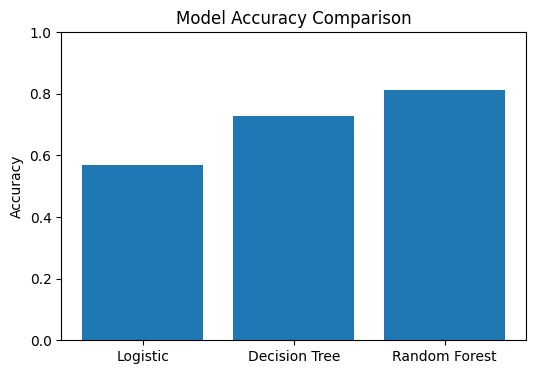

In [81]:
models = ["Logistic", "Decision Tree", "Random Forest"]
accuracies = [log_acc, dt_acc, rf_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [ ]:
print("Classification Report - Random Forest\n")
print(classification_report(y_test, rf_pred))


📊 Classification Report - Random Forest

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.83      0.81      0.82       207
           2       0.95      0.74      0.83        47
           3       1.00      0.50      0.67         6

    accuracy                           0.81       414
   macro avg       0.89      0.73      0.78       414
weighted avg       0.82      0.81      0.81       414



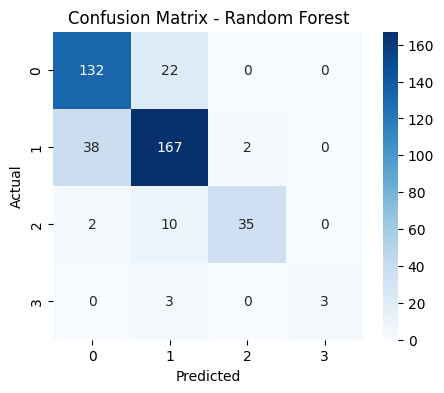

In [83]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import joblib
import os

MODEL_DIR = "../models"
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(rf_model, os.path.join(MODEL_DIR, "random_forest_model.pkl"))

print("Random Forest model saved successfully")


✅ Random Forest model saved successfully
